<a href="https://colab.research.google.com/github/fengfrankgthb/BUS-41204/blob/main/Deep%20Learning/Xray_resnet_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Laenring Concepts

* **Hebbian Learning Rule**: A neuron i learns from wll of its adjacent neuron j. The connection weights between to adjacent *neurons* (i, and all j) is $w_{ij}$, whose value is given by the weight formula:
  $$w_{ij} = \frac{1}{N} \sum_{\mu=1}^{p} \xi_i^{(\mu)} \xi_j^{(\mu)}$$
  where:
    * N is the number of neurons in the network.
    * p is the number of patterns to be stored.
    * $\xi_i^{(\mu)}$ is the state of the i-th neuron in the μ-th pattern.

* **Hopfield Net**: Hopfield Net has each neuron connecting all anothers, and uses Hebbian Rule to update the tates of neuron i:
  $$s_j(t+1) = s_i(t) + \sum_{j \neq i}^{J} w_{ij} s_j(t)$$

  where $\sum_{j \neq i}^{J} w_{ij} s_j(t)$ can be 1 (both i & j are firing), or -1 (not both firing).

* **Mark I Perceptron**: Hardware based neural network consisting of sensory, association and response units. It processes, learns, and trains to classfy simple objects on printed sheets that are linear seperable patterns only.

* **MNIST**: Modified National Institute of Standards and Technology database, numbers in 28*28 pixels and black-white (0-255).

* **Neural Network as a Function**: A multi-layer NN formular:
$$f(x) = \sigma(W_1(\sigma(W_2(\sigma(W_3(\cdots \sigma(W_d(x))\cdots)))))$$
If $Z_m^{T}=(z_1, z_2,...z_m)$ is the output vector of a layer and $X_n=(x_1, x_2,...x_n)$ is the input vector,

$$Z_m = W_{m,n} * X_n$$

## Activation Functions:
Activation in each step makes the step meaningful. Even simple activations like below helps to define multi-sectional plane/surface that serves as the decision threshhold. Without them, it makes no sense to have steps/layers.

* **ReLu**:  σ(x) = max ( 0 , x ). ReLU is generally a good choice for hidden layers in many deep learning models due to its **speed and effectiveness at mitigating the vanishing gradient problem**.
* **Step**:  σ(x) = 1, if x > 0. Step is generally not used in neural networks due to the **gradient problem**.
* **Sigmoid**: $\sigma(x) = \frac{e^x}{1 + e^x}$. Sigmoid is historically significant and sometimes used in **output layers for binary classification**, but it's less common in hidden layers due to **vanishing gradients problem**.
* **Linear**:  σ(x) = x. Linear activation functions are typically only used in the **output layer for regression problems** where the desired output is a **real-valued number**.

Explain Codes Below:

* **BytesIO**: a class from the io module that provides an in-memory, file-like object for handling binary data (bytes). BytesIO allows to treat a block of memory as if it were a file open for binary data. Instead of reading from or writing to a disk, the data is stored in a buffer in RAM. It implements the standard file methods like read(), write(), seek(), etc.
  * Working with binary data in memory, faster than disk-based file operations
  * File-like interface simulates file operations in testing without affecting file system.

* **request**: a popular Python library used for making HTTP requests. It simplifies the process of sending various types of requests (GET, POST, PUT, DELETE, etc.) to web servers. It handles:
  * Sending data in the request (form data, JSON, etc.).
  * Handling cookies and sessions.
  * Dealing with authentication.
  * Parsing server responses.

* **Torch**: the core library for PyTorch, an open-source machine learning framework provides:
  * Multidimensional arrays called **tensors**, which are similar to NumPy arrays but can run on GPUs for accelerated computation.
  * **Functions for tensors** for performing mathematical operations on tensors.
  * **Tools** for building and training neural networks.
  * Automatic differentiation (autograd) for efficiently calculating **gradients**, which is essential for training neural networks.

* **torch.nn**: a sub-library within PyTorch that provides higher-level tools for building neural networks. It contains:
  * Pre-defined layers: Fully connected layers, convolutional layers, recurrent layers, etc.
  * Activation functions: ReLU, sigmoid, tanh, etc.
  * Loss functions:  Cross-entropy loss, mean squared error, etc.
  * Containers for organizing networks: Sequential, ModuleList, ModuleDict.
* **torch.utils**: a module that provides various utility functions and classes to make deep learning workflow easier. It's essentially a collection of tools that supplement the core PyTorch functionality. Key components:
  * **torch.utils.data**: This is probably the most commonly used part of torch.utils. It provides tools for efficient data loading and manipulation:
    * **Dataset**: An abstract class that represents your dataset. You can create your own dataset class by inheriting from it and defining how to access your data.
    * **DataLoader**: An iterable that provides batches of data from your Dataset. It handles shuffling, batching, and parallel loading of data, which is essential for efficient training of neural networks.
  * **torch.utils.tensorboard**: This module provides utilities to create visualizations for TensorBoard, a tool for visualizing the progress of your machine learning experiments. It tracks metrics like loss and accuracy, visualize model graphs, and inspect other aspects of your training process.
  * **torch.utils.checkpoint**: This module provides a way to trade compute for memory. It allows you to checkpoint parts of your model during the forward pass and recompute them during the backward pass. This can significantly reduce memory consumption, especially when training very deep models, at the cost of increased computation time.
* **torch.vision**: a library that is part of the PyTorch ecosystem. It's specifically designed for computer vision tasks. Here's a breakdown of what it provides:
  * **Datasets**: It includes a collection of popular, pre-loaded datasets for computer vision.  These allow you to quickly get started with your experiments.  Examples include:
    * MNIST
    * CIFAR10, CIFAR100
    * ImageNet
    * COCO

  * **Model architectures**: torchvision provides implementations of many pre-trained neural network architectures that are commonly used for computer vision tasks.  These can be used as a starting point for your own models, or used directly for tasks like image classification.  Examples include:
    * ResNet
    * AlexNet
    * VGG
    * EfficientNet

  * **Image transformations**: It offers a set of functions to perform various transformations on images.  These are useful for:
    * Preprocessing data (e.g., normalizing pixel values).
    * Data augmentation (e.g., random cropping, rotations, and flips) which helps improve the robustness and generalization of your models.

# Chest X-ray Classification with ResNet18

## Overview

This notebook demonstrates how to load a preprocessed X-ray dataset, fine-tune a pretrained ResNet-18 model for binary classification, and evaluate its performance. The focus is on exploring how well transfer learning can work when only a small amount of labeled training data is available. We analyze the model’s ability to generalize and discuss ways to improve performance under data-scarce conditions.

In [2]:
from io import BytesIO

import matplotlib.pyplot as plt
import requests
import torch
import torch.nn as nn
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision import models

## Load the Preprocessed Dataset

We load a preprocessed dataset stored in a `.pt` file, which contains PyTorch tensors representing
chest X-ray images and their associated labels. Each label indicates whether the scan shows evidence
of **Infiltration** or if there was **No Finding** in the patient's lungs.

**Remark**: This is a rather big file, the download takes roughly **90 seconds**.

**------self note------**

**images = data["images"]** defines a tensor with the *images* in the *data* file as its images. This is the X data in the ResNet model.
**labels = data["labels"]** defines a tensor with the *labels* in the *data* file as its labels. This is Y data in the ResNet model.

In [3]:
dropbox_url = "https://www.dropbox.com/scl/fi/f4dm7jx545iifys32rw3n/xray_data.pt?rlkey=khmvzz8rbkxav66jv5u48bg80&st=f7bruilv&dl=1"
response = requests.get(dropbox_url)
response.raise_for_status()
data = torch.load(BytesIO(response.content), weights_only=False)
images = data["images"]
labels = data["labels"]
dataset = TensorDataset(images, labels)

Let's have a look at one image!

The 1st image unnormailzed data:
tensor([[[0.7059, 0.5922, 0.3843,  ..., 0.0118, 0.0118, 0.0078],
         [0.5765, 0.3804, 0.1804,  ..., 0.0078, 0.0078, 0.0039],
         [0.3882, 0.1922, 0.0549,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.4627, 0.3137, 0.1961,  ..., 0.4549, 0.3725, 0.2745],
         [0.4431, 0.3059, 0.2000,  ..., 0.4863, 0.4039, 0.3059],
         [0.4275, 0.3020, 0.2078,  ..., 0.5176, 0.4314, 0.3294]],

        [[0.7059, 0.5922, 0.3843,  ..., 0.0118, 0.0118, 0.0078],
         [0.5765, 0.3804, 0.1804,  ..., 0.0078, 0.0078, 0.0039],
         [0.3882, 0.1922, 0.0549,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.4627, 0.3137, 0.1961,  ..., 0.4549, 0.3725, 0.2745],
         [0.4431, 0.3059, 0.2000,  ..., 0.4863, 0.4039, 0.3059],
         [0.4275, 0.3020, 0.2078,  ..., 0.5176, 0.4314, 0.3294]],

        [[0.7059, 0.5922, 0.3843,  ..., 0.0118, 0.0118, 0.0078],
         [0.5765, 0.3804, 0.1804,  ..., 0.0078, 0.0078, 0.0039],
         [0.3882, 0.1922,

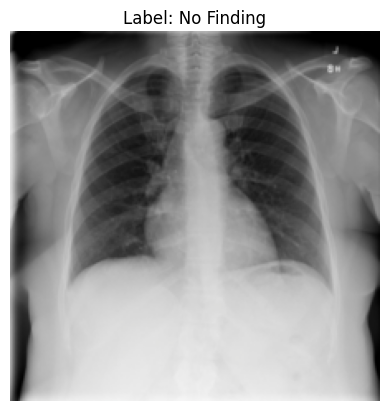

In [17]:
# Choose an index
idx = 0
image = images[idx]
label = labels[idx]

# Unnormalize the data (the first image, idx=0)
# Defined the means and stds for 3 Colors (R, G, B), 1 Height, and 1 Width
# Only R/G/B data are normalized in image, not the data for H/W
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

# Unnormalized the image data so that we can display the chosen image
image = image * std + mean  # reverse normalization
image = image.clamp(0, 1)  # clip values to [0, 1]

# print image unnormalized data
print(f"The 1st image unnormailzed data:")
print(image)

# Plot
plt.imshow(image.permute(1, 2, 0))  # CHW -> HWC
plt.title(f"Label: {'Infiltration' if label == 1 else 'No Finding'}")
plt.axis("off")
plt.show()




Add code to show data in //.pt// of first three images below, in normalized pattern.

Image 1 shape: torch.Size([3, 224, 224]), dtype: torch.float32
Image 1 might have values outside the range 0-1. Clipping to [0,1] for display.
Image 2 shape: torch.Size([3, 224, 224]), dtype: torch.float32
Image 2 might have values outside the range 0-1. Clipping to [0,1] for display.
Image 3 shape: torch.Size([3, 224, 224]), dtype: torch.float32
Image 3 might have values outside the range 0-1. Clipping to [0,1] for display.


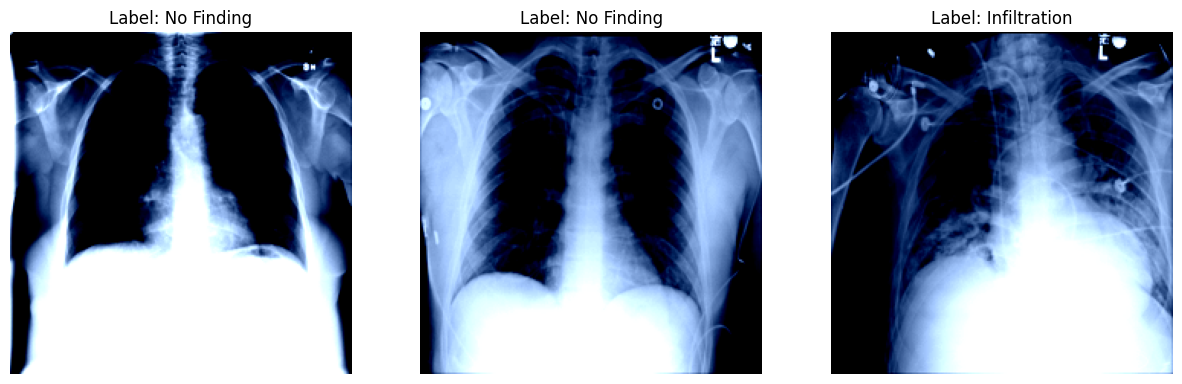

In [15]:
# Display the first "n" images as the original normalized style.
n = 3
num_images = min(n, len(dataset))  # Ensure we don't try to display more images than exist
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Adjust figsize as needed

for i in range(num_images):
    image = images[i]
    label = labels[i]
    print(f"Image {i+1} shape: {image.shape}, dtype: {image.dtype}")

    # Assuming the image is in CHW format, permute to HWC for matplotlib
    image_to_plot = image.permute(1, 2, 0)

    # If the image has values outside the 0-1 range, clip.  Important for display!
    if image_to_plot.min() < 0 or image_to_plot.max() > 1:
        print(f"Image {i+1} might have values outside the range 0-1. Clipping to [0,1] for display.")
        image_to_plot = image_to_plot.clamp(0, 1)

    if num_images == 1:
        axes.imshow(image_to_plot)
        axes.set_title(f"Label: {'Infiltration' if label == 1 else 'No Finding'}")
        axes.axis('off')
    else:
        axes[i].imshow(image_to_plot)
        axes[i].set_title(f"Label: {'Infiltration' if label == 1 else 'No Finding'}")
        axes[i].axis('off')

plt.show()

In [18]:
# Display the first 2 images as tensors
num_images = min(2, len(dataset))  # Ensure we don't try to display more images than exist

print("First 2 Images as Tensors as originally normalized:")
for i in range(num_images):
    image = images[i]
    label = labels[i]
    print(f"Image {i+1} - Label: {label}")
    print(image)  # Print the raw tensor data
    print(f"Shape: {image.shape}, Dtype: {image.dtype}")
    print("-" * 20)  # Separator for clarity

num_elements = images.nelement()
print(f"Tensor shape: {images.shape}")
print(f"Number of elements: {num_elements}")

First 2 Images as Tensors as originally normalized:
Image 1 - Label: 0
tensor([[[ 0.9646,  0.4679, -0.4397,  ..., -2.0665, -2.0665, -2.0837],
         [ 0.3994, -0.4568, -1.3302,  ..., -2.0837, -2.0837, -2.1008],
         [-0.4226, -1.2788, -1.8782,  ..., -2.1008, -2.1008, -2.1008],
         ...,
         [-0.0972, -0.7479, -1.2617,  ..., -0.1314, -0.4911, -0.9192],
         [-0.1828, -0.7822, -1.2445,  ...,  0.0056, -0.3541, -0.7822],
         [-0.2513, -0.7993, -1.2103,  ...,  0.1426, -0.2342, -0.6794]],

        [[ 1.1155,  0.6078, -0.3200,  ..., -1.9832, -1.9832, -2.0007],
         [ 0.5378, -0.3375, -1.2304,  ..., -2.0007, -2.0007, -2.0182],
         [-0.3025, -1.1779, -1.7906,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [ 0.0301, -0.6352, -1.1604,  ..., -0.0049, -0.3725, -0.8102],
         [-0.0574, -0.6702, -1.1429,  ...,  0.1352, -0.2325, -0.6702],
         [-0.1275, -0.6877, -1.1078,  ...,  0.2752, -0.1099, -0.5651]],

        [[ 1.3328,  0.8274, -0.0964,  ..., -1

### Now check the Red data of the 1st image:

* **Unnormalized 0.7059** = 0.9646 * 0.229 + 0.485
* **Normalized: 0.9646** = (0.7059 - 0.485) / 0.229
* *Mean: 0.485* ; *Std: 0.229*

## Create Train and Validation Sets

We split the dataset into 70% for training  and 30% for validation. This is a typical
training/validation split.

**------self note-----**

splitting data 70-30, makes no data for test.

**------end note------**

In [11]:
train_size = int(0.7 * len(dataset)) # 30% for training
val_size = len(dataset) - train_size # 70% for validation, and no data left for testing
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

## Model Setup

**Convolutional neural networks (CNNs)** have become the foundation of modern image analysis, with early
architectures like **AlexNet** and **VGG** paving the way for deeper and more powerful models. **ResNet-18**
continues this evolution by introducing residual connections, which help address the <u>vanishing
gradient problem</u> and enable the <u>training of deeper networks</u>. While much deeper architectures such as
**ResNet-50**, **ResNet-101**, or **transformer-based models** are now common in state-of-the-art applications,
we opt for **ResNet-18** due to limited computational resources.

Pretrained on ImageNet, ResNet-18 captures general visual features that can be fine-tuned for domain-specific tasks such as diagnosing conditions from X-ray images. We adapt the final fully connected layer for binary classification to predict a patient’s diagnosis from an X-ray image.

Given a small training set of only 500 images, we leverage transfer learning to compensate for the scarcity of labeled data. By fine-tuning a model that has already learned rich feature representations, we aim to boost performance despite the limited dataset.

Let’s see how well it works!

**------self note------**

There are 2500 images, not 500.

**------end note------**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]


## Training Loop
We train the model for 5 epochs, tracking the training loss and accuracy.

**Remark**: Training may take up to 90 minutes on your machine. Everything has already been precompiled, so you don’t need to actually run the code unless you’d like to.

**------self note------**

Each epoch runs about 9-10 minutes. So all 5 epochs take about 46 minutes.

**------end note------**

In [ ]:
train_losses = []
train_accuracies = []
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / len(train_loader.dataset)
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}: Train Loss = {avg_loss:.4f}, Accuracy = {accuracy:.4f}")

Epoch 1: Train Loss = 0.6347, Accuracy = 0.6720
Epoch 2: Train Loss = 0.4147, Accuracy = 0.8366
Epoch 3: Train Loss = 0.2532, Accuracy = 0.9349
Epoch 4: Train Loss = 0.1179, Accuracy = 0.9926
Epoch 5: Train Loss = 0.0602, Accuracy = 0.9989


Let's have a look at the training loss and accuracy.

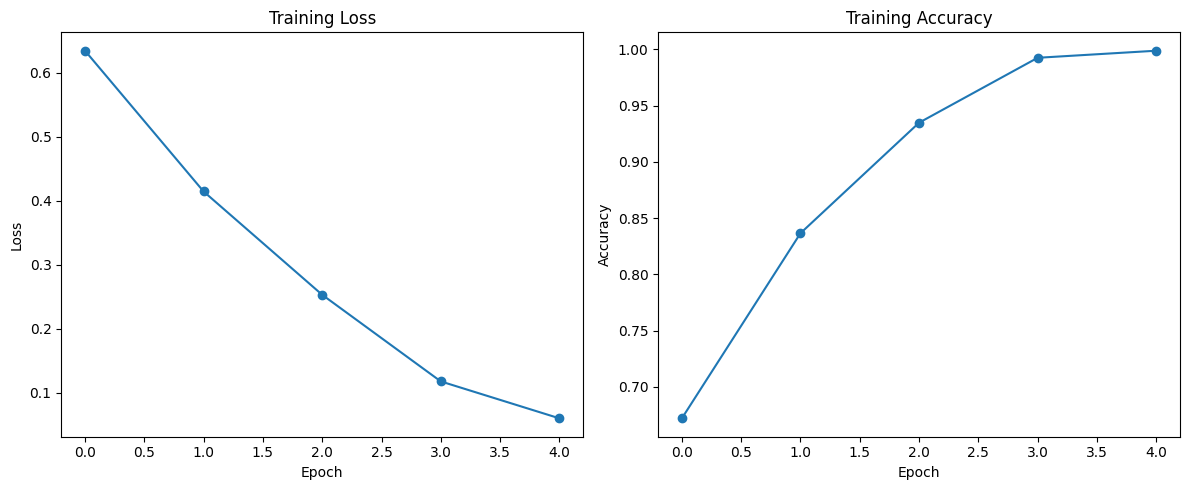

In [ ]:
# Plot training loss and accuracy over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, marker="o")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, marker="o")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

## Validation Evaluation
After training, we evaluate the model on the validation set.

Validation Accuracy: 0.6427 (482/750)


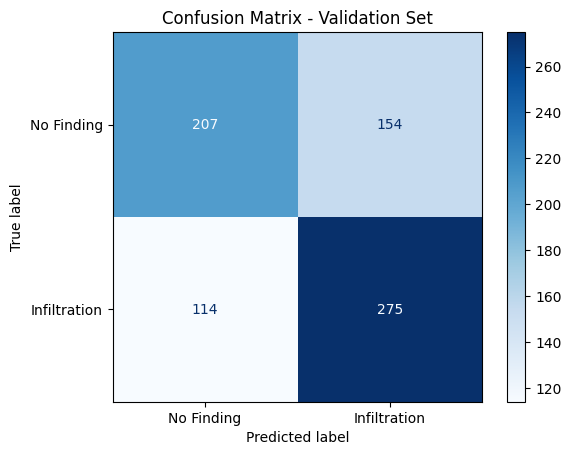

In [ ]:
model.eval()
val_correct = 0
val_total = 0
all_preds = []
all_labels = []

# Accuracy on validation set
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

        val_correct += (preds == labels).sum().item()
        val_total += labels.size(0)

val_accuracy = val_correct / val_total
print(f"Validation Accuracy: {val_accuracy:.4f} ({val_correct}/{val_total})")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["No Finding", "Infiltration"]
)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Set")
plt.show()

On the validation set, the model achieves an accuracy of roughly 68% (507 out of 750 correct predictions). For context, random guessing would result in around 50% accuracy for a binary classification task, so the model is learning something.

Still, there's plenty of room for improvement.

Here are two approaches to improve the performance:

- **Fine-tune more layers**  
  Instead of freezing the entire backbone, selectively unfreezing the last few blocks (e.g., `layer4`) can help the model adapt better to the target domain.

- **Use a more expressive model**  
  Switching to a deeper architecture like ResNet-50 or EfficientNet (if compute allows) may improve generalization.


## Post-learning: To run data with train/val/test



In [ ]:
from torch.utils.data import DataLoader, random_split, TensorDataset

def create_train_val_test_loaders(dataset, batch_size=32, shuffle=True):

    total_size = len(dataset)
    train_size = int(0.7 * total_size)  # 70% for training
    val_size = int(0.2 * total_size)    # 20% for validation
    test_size = total_size - train_size - val_size  # 10% for testing

    # Ensure that the sizes add up correctly
    if train_size + val_size + test_size != total_size:
        raise ValueError(
            "Sum of train, val, and test sizes does not equal the total dataset size."
        )
    # Perform the split
    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size]
    )

    # Create the DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # No need to shuffle val/test
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # No need to shuffle val/test

    return train_loader, val_loader, test_loader